In [5]:
import pandas as pd

In [6]:
# Load the dataset
df = pd.read_csv('../data/final_train_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (3787, 101)

First few rows:


,Provider,BeneID_get_mode_count,AttendingPhysician_get_mode_count,OperatingPhysician_nunique,OperatingPhysician_get_mode_count,OtherPhysician_get_mode_count,ClmAdmitDiagnosisCode_nunique,DiagnosisGroupCode_nunique,State_nunique,County_Name_nunique,...,State_Concentration,Diag_Concentration,GroupCode_Concentration,County_Concentration,Circulatory_Rate,IllDefined_Rate,MetabolicBlood_Rate,Musculoskeletal_Rate,Supplementary_Rate,PotentialFraud
0,PRV51001,2,5,5,1,2,8,6,1,7,...,1.000000,0.560000,0.8,0.240000,0.560000,0.560000,0.520000,0.080000,0.400000,0
1,PRV51004,4,16,19,4,10,13,1,9,30,...,0.503356,0.812081,1.0,0.147651,0.496644,0.382550,0.449664,0.194631,0.550336,0
2,PRV51013,2,22,5,5,7,6,1,2,9,...,0.652174,0.739130,1.0,0.304348,0.282609,0.456522,0.239130,0.239130,0.608696,0
3,PRV51014,3,7,6,3,4,5,1,2,6,...,0.866667,0.833333,1.0,0.400000,0.633333,0.400000,0.566667,0.200000,0.533333,0
4,PRV51015,2,4,1,1,1,1,1,1,3,...,1.000000,1.000000,1.0,0.625000,0.000000,0.500000,0.875000,0.250000,0.750000,0


In [7]:
# Import additional libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Class Imbalance Analysis

In this section, we'll analyze the class distribution of the target variable `PotentialFraud` to understand if there's an imbalance that needs to be addressed before modeling.

In [8]:
# 1. Basic Class Distribution
print("="*60)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*60)

# Count of each class
class_counts = df['PotentialFraud'].value_counts().sort_index()
print(f"\nClass Counts:")
print(class_counts)

# Percentage distribution
class_percentages = df['PotentialFraud'].value_counts(normalize=True).sort_index() * 100
print(f"\nClass Percentages:")
for cls, pct in class_percentages.items():
    print(f"  Class {cls}: {pct:.2f}%")

# Calculate imbalance ratio
majority_class = class_counts.max()
minority_class = class_counts.min()
imbalance_ratio = majority_class / minority_class

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"(Majority class is {imbalance_ratio:.2f}x larger than minority class)")

# Determine severity
if imbalance_ratio < 1.5:
    severity = "Balanced"
elif imbalance_ratio < 3:
    severity = "Slightly Imbalanced"
elif imbalance_ratio < 10:
    severity = "Moderately Imbalanced"
else:
    severity = "Highly Imbalanced"

print(f"\nImbalance Severity: {severity}")

CLASS DISTRIBUTION ANALYSIS

Class Counts:
PotentialFraud
0    3433
1     354
Name: count, dtype: int64

Class Percentages:
  Class 0: 90.65%
  Class 1: 9.35%

Imbalance Ratio: 9.70:1
(Majority class is 9.70x larger than minority class)

Imbalance Severity: Moderately Imbalanced


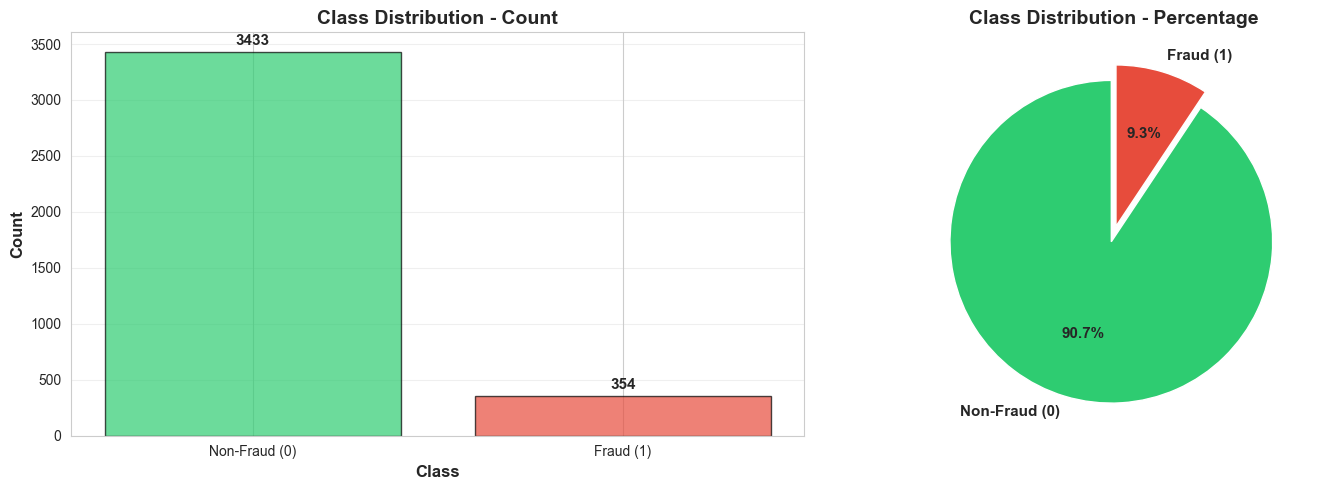

In [9]:
# 2. Visualize Class Distribution - Bar Chart
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot - counts
axes[0].bar(class_counts.index, class_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution - Count', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + max(class_counts.values)*0.01, str(v), 
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Pie chart - percentages
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
axes[1].pie(class_percentages.values, labels=['Non-Fraud (0)', 'Fraud (1)'], 
           autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
           textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
# 3. Statistical Summary by Class
print("="*60)
print("STATISTICAL SUMMARY BY CLASS")
print("="*60)

for class_val in sorted(df['PotentialFraud'].unique()):
    print(f"\n{'Class ' + str(class_val) + (' (Non-Fraud)' if class_val == 0 else ' (Fraud)')}")
    print("-" * 40)
    class_data = df[df['PotentialFraud'] == class_val]
    print(f"  Count: {len(class_data)}")
    print(f"  Percentage: {len(class_data)/len(df)*100:.2f}%")
    
print("\n" + "="*60)

STATISTICAL SUMMARY BY CLASS

Class 0 (Non-Fraud)
----------------------------------------
  Count: 3433
  Percentage: 90.65%

Class 1 (Fraud)
----------------------------------------
  Count: 354
  Percentage: 9.35%



### Class Imbalance Handling Recommendations

Based on the imbalance analysis, we'll evaluate different strategies:

In [11]:
# 4. Imbalance Handling Strategies
print("="*60)
print("RECOMMENDED STRATEGIES FOR HANDLING CLASS IMBALANCE")
print("="*60)

strategies = {
    "1. Class Weighting": {
        "description": "Assign higher weights to minority class during model training",
        "pros": ["No data modification", "Works with most algorithms", "Fast"],
        "cons": ["May not work well with extreme imbalance"],
        "when_to_use": "When imbalance ratio < 10:1"
    },
    "2. SMOTE (Synthetic Minority Over-sampling)": {
        "description": "Generate synthetic samples for minority class",
        "pros": ["Creates diverse samples", "Reduces overfitting", "Well-tested"],
        "cons": ["Can create noise", "Computationally expensive"],
        "when_to_use": "When you need more minority samples"
    },
    "3. Random Under-sampling": {
        "description": "Reduce majority class samples randomly",
        "pros": ["Fast", "Reduces training time", "Simple"],
        "cons": ["Loss of information", "May remove important samples"],
        "when_to_use": "When you have very large datasets"
    },
    "4. Combination (Over + Under sampling)": {
        "description": "Combine SMOTE with under-sampling",
        "pros": ["Balanced approach", "Preserves information"],
        "cons": ["More complex", "Requires tuning"],
        "when_to_use": "When imbalance ratio > 10:1"
    },
    "5. Ensemble Methods": {
        "description": "Use algorithms designed for imbalanced data (BalancedRandomForest, EasyEnsemble)",
        "pros": ["Built-in handling", "Often best performance"],
        "cons": ["Algorithm-specific", "May need more tuning"],
        "when_to_use": "For production models with severe imbalance"
    }
}

for strategy, details in strategies.items():
    print(f"\n{strategy}: {details['description']}")
    print(f"  ✓ Pros: {', '.join(details['pros'])}")
    print(f"  ✗ Cons: {', '.join(details['cons'])}")
    print(f"  📌 Best for: {details['when_to_use']}")

print("\n" + "="*60)

RECOMMENDED STRATEGIES FOR HANDLING CLASS IMBALANCE

1. Class Weighting: Assign higher weights to minority class during model training
  ✓ Pros: No data modification, Works with most algorithms, Fast
  ✗ Cons: May not work well with extreme imbalance
  📌 Best for: When imbalance ratio < 10:1

2. SMOTE (Synthetic Minority Over-sampling): Generate synthetic samples for minority class
  ✓ Pros: Creates diverse samples, Reduces overfitting, Well-tested
  ✗ Cons: Can create noise, Computationally expensive
  📌 Best for: When you need more minority samples

3. Random Under-sampling: Reduce majority class samples randomly
  ✓ Pros: Fast, Reduces training time, Simple
  ✗ Cons: Loss of information, May remove important samples
  📌 Best for: When you have very large datasets

4. Combination (Over + Under sampling): Combine SMOTE with under-sampling
  ✓ Pros: Balanced approach, Preserves information
  ✗ Cons: More complex, Requires tuning
  📌 Best for: When imbalance ratio > 10:1

5. Ensemble Me

In [12]:
# 5. Calculate Class Weights for Model Training
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['PotentialFraud']),
    y=df['PotentialFraud']
)

class_weights_dict = dict(zip(np.unique(df['PotentialFraud']), class_weights_array))

print("="*60)
print("COMPUTED CLASS WEIGHTS")
print("="*60)
print(f"\nClass Weights (for use in model training):")
for cls, weight in class_weights_dict.items():
    print(f"  Class {cls}: {weight:.4f}")

print(f"\n💡 Use these weights in your model's 'class_weight' parameter")
print(f"   Example: RandomForestClassifier(class_weight={class_weights_dict})")
print("="*60)

COMPUTED CLASS WEIGHTS

Class Weights (for use in model training):
  Class 0: 0.5516
  Class 1: 5.3489

💡 Use these weights in your model's 'class_weight' parameter
   Example: RandomForestClassifier(class_weight={np.int64(0): np.float64(0.5515584037285173), np.int64(1): np.float64(5.348870056497175)})


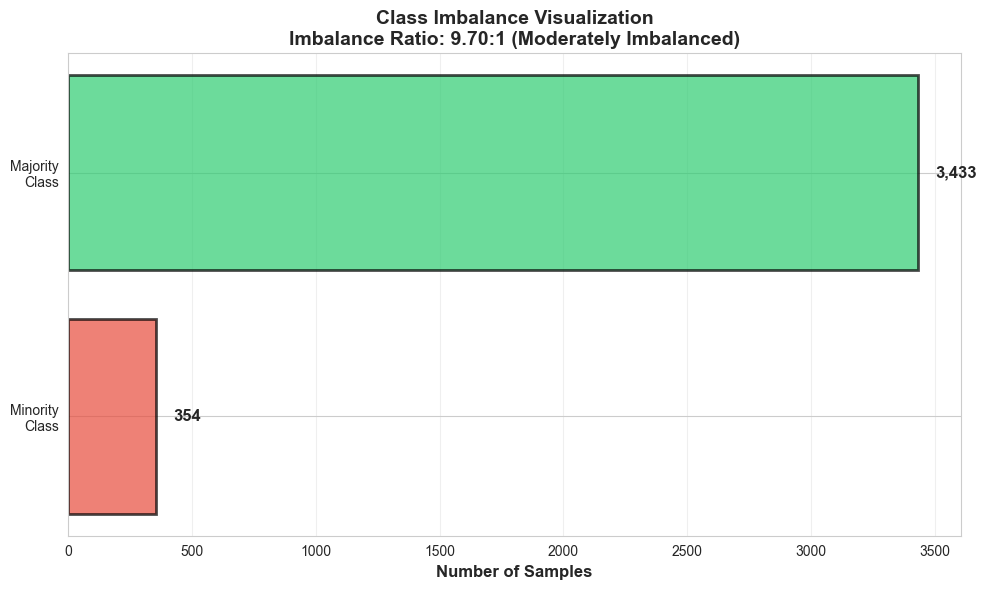

In [13]:
# 6. Visualize Imbalance Severity
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bar showing imbalance
categories = ['Minority\nClass', 'Majority\nClass']
values = [minority_class, majority_class]
colors_bar = ['#e74c3c', '#2ecc71']

bars = ax.barh(categories, values, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, values)):
    ax.text(val + max(values)*0.02, i, f'{val:,}', 
           va='center', fontweight='bold', fontsize=12)

ax.set_xlabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title(f'Class Imbalance Visualization\nImbalance Ratio: {imbalance_ratio:.2f}:1 ({severity})', 
            fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Impact on Model Performance Metrics

Class imbalance affects which metrics we should prioritize:

In [14]:
# 7. Evaluation Metrics Guidance for Imbalanced Data
print("="*60)
print("EVALUATION METRICS FOR IMBALANCED CLASSIFICATION")
print("="*60)

metrics_guide = {
    "❌ Accuracy": {
        "issue": "Can be misleading with imbalanced data",
        "example": f"A model predicting all samples as majority class would get {class_percentages.max():.1f}% accuracy",
        "use": "NOT recommended as primary metric"
    },
    "✅ Precision": {
        "issue": "Measures how many predicted frauds are actually frauds",
        "example": "Important when false positives are costly",
        "use": "Use when you want to minimize false alarms"
    },
    "✅ Recall (Sensitivity)": {
        "issue": "Measures how many actual frauds are detected",
        "example": "Important when missing frauds is costly",
        "use": "Use when you can't afford to miss fraud cases"
    },
    "✅ F1-Score": {
        "issue": "Harmonic mean of Precision and Recall",
        "example": "Balances both precision and recall",
        "use": "Use when you need balance between precision and recall"
    },
    "✅ PR-AUC": {
        "issue": "Area under Precision-Recall curve",
        "example": "Better than ROC-AUC for imbalanced data",
        "use": "Primary metric for imbalanced classification"
    },
    "✅ ROC-AUC": {
        "issue": "Area under ROC curve",
        "example": "Measures overall classification ability",
        "use": "Secondary metric, can be optimistic with imbalance"
    }
}

for metric, info in metrics_guide.items():
    print(f"\n{metric}")
    print(f"  Description: {info['issue']}")
    print(f"  Example: {info['example']}")
    print(f"  Recommendation: {info['use']}")

print("\n" + "="*60)
print("🎯 RECOMMENDED PRIMARY METRICS FOR THIS DATASET:")
print("   1. PR-AUC (Precision-Recall AUC)")
print("   2. F1-Score")
print("   3. Recall (if missing fraud is very costly)")
print("="*60)

EVALUATION METRICS FOR IMBALANCED CLASSIFICATION

❌ Accuracy
  Description: Can be misleading with imbalanced data
  Example: A model predicting all samples as majority class would get 90.7% accuracy
  Recommendation: NOT recommended as primary metric

✅ Precision
  Description: Measures how many predicted frauds are actually frauds
  Example: Important when false positives are costly
  Recommendation: Use when you want to minimize false alarms

✅ Recall (Sensitivity)
  Description: Measures how many actual frauds are detected
  Example: Important when missing frauds is costly
  Recommendation: Use when you can't afford to miss fraud cases

✅ F1-Score
  Description: Harmonic mean of Precision and Recall
  Example: Balances both precision and recall
  Recommendation: Use when you need balance between precision and recall

✅ PR-AUC
  Description: Area under Precision-Recall curve
  Example: Better than ROC-AUC for imbalanced data
  Recommendation: Primary metric for imbalanced classifica

In [15]:
# 8. Summary Report
print("\n" + "="*60)
print("CLASS IMBALANCE ANALYSIS - SUMMARY REPORT")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   Total Samples: {len(df):,}")
print(f"   Total Features: {df.shape[1] - 1}")

print(f"\n📈 CLASS DISTRIBUTION:")
for cls in sorted(df['PotentialFraud'].unique()):
    count = class_counts[cls]
    pct = class_percentages[cls]
    label = "Non-Fraud" if cls == 0 else "Fraud"
    print(f"   Class {cls} ({label}): {count:,} samples ({pct:.2f}%)")

print(f"\n⚖️ IMBALANCE METRICS:")
print(f"   Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   Severity Level: {severity}")

print(f"\n💡 RECOMMENDATIONS:")
if imbalance_ratio < 3:
    print(f"   • Class weighting should be sufficient")
    print(f"   • Focus on proper cross-validation")
elif imbalance_ratio < 10:
    print(f"   • Use class weighting as baseline")
    print(f"   • Consider SMOTE for better performance")
    print(f"   • Use stratified cross-validation")
else:
    print(f"   • Severe imbalance detected!")
    print(f"   • Use combination of SMOTE + Under-sampling")
    print(f"   • Consider ensemble methods (BalancedRandomForest)")
    print(f"   • Use stratified cross-validation")

print(f"\n📏 EVALUATION STRATEGY:")
print(f"   • Primary Metric: PR-AUC, F1-Score")
print(f"   • Secondary Metrics: Precision, Recall, ROC-AUC")
print(f"   • Avoid using: Accuracy as primary metric")

print("\n" + "="*60)


CLASS IMBALANCE ANALYSIS - SUMMARY REPORT

📊 DATASET OVERVIEW:
   Total Samples: 3,787
   Total Features: 100

📈 CLASS DISTRIBUTION:
   Class 0 (Non-Fraud): 3,433 samples (90.65%)
   Class 1 (Fraud): 354 samples (9.35%)

⚖️ IMBALANCE METRICS:
   Imbalance Ratio: 9.70:1
   Severity Level: Moderately Imbalanced

💡 RECOMMENDATIONS:
   • Use class weighting as baseline
   • Consider SMOTE for better performance
   • Use stratified cross-validation

📏 EVALUATION STRATEGY:
   • Primary Metric: PR-AUC, F1-Score
   • Secondary Metrics: Precision, Recall, ROC-AUC
   • Avoid using: Accuracy as primary metric



## Model Training with Pipeline and GridSearchCV

We'll build a comprehensive pipeline that:
1. Handles class imbalance using SMOTE
2. Scales features
3. Trains multiple models with hyperparameter tuning
4. Uses stratified cross-validation

In [16]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, average_precision_score,
                             roc_curve, precision_recall_curve)

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [22]:
# Prepare data for modeling
print("="*60)
print("DATA PREPARATION")
print("="*60)

# Check for non-numeric columns
print("\nChecking for non-numeric columns...")
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols:
    print(f"Found non-numeric columns: {non_numeric_cols}")
    print("These will be dropped before modeling.")
else:
    print("All columns are numeric.")

# Separate features and target
X = df.drop('PotentialFraud', axis=1)
y = df['PotentialFraud']

# Drop non-numeric columns (like Provider ID)
if non_numeric_cols:
    non_numeric_to_drop = [col for col in non_numeric_cols if col in X.columns]
    if non_numeric_to_drop:
        X = X.drop(columns=non_numeric_to_drop)
        print(f"\nDropped columns: {non_numeric_to_drop}")

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")

# Split data into train and test sets (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())
print("="*60)

DATA PREPARATION

Checking for non-numeric columns...
Found non-numeric columns: ['Provider']
These will be dropped before modeling.

Dropped columns: ['Provider']

Features shape: (3787, 99)
Target shape: (3787,)

Target distribution:
PotentialFraud
0    3433
1     354
Name: count, dtype: int64

Training set size: 3029 samples
Test set size: 758 samples

Training set class distribution:
PotentialFraud
0    2746
1     283
Name: count, dtype: int64

Test set class distribution:
PotentialFraud
0    687
1     71
Name: count, dtype: int64


In [ ]:
# Define models and their hyperparameter grids
print("="*60)
print("MODEL CONFIGURATIONS")
print("="*60)

models_and_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [5, 10, 15, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__class_weight': ['balanced', None]
        }
    },
    
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [10, 20, 30, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['sqrt', 'log2'],
            'classifier__class_weight': ['balanced', 'balanced_subsample', None]
        }
    },
    
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__subsample': [0.8, 1.0]
        }
    },
    
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs', 'liblinear'],
            'classifier__class_weight': ['balanced', None]
        }
    }
    
    # SVM EXCLUDED - Too slow for this dataset size
    # 'SVM': {
    #     'model': SVC(random_state=42, probability=True),
    #     'params': {
    #         'classifier__C': [0.1, 1, 10],
    #         'classifier__kernel': ['rbf'],
    #         'classifier__gamma': ['scale'],
    #         'classifier__class_weight': ['balanced']
    #     }
    # }
}

print(f"\n✓ Configured {len(models_and_params)} models:")
for model_name in models_and_params.keys():
    n_params = len(models_and_params[model_name]['params'])
    print(f"  • {model_name}: {n_params} hyperparameter groups")
print(f"\n⚠️ Note: SVM excluded due to long training time")
print("="*60)

MODEL CONFIGURATIONS

✓ Configured 5 models:
  • Decision Tree: 5 hyperparameter groups
  • Random Forest: 6 hyperparameter groups
  • Gradient Boosting: 6 hyperparameter groups
  • Logistic Regression: 4 hyperparameter groups
  • SVM: 4 hyperparameter groups


In [19]:
# Function to create pipeline with SMOTE and scaling
def create_pipeline(model):
    """
    Creates a pipeline with:
    1. SMOTE for handling class imbalance
    2. StandardScaler for feature scaling
    3. Classifier
    """
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    return pipeline

print("✓ Pipeline creation function defined")
print("\nPipeline steps:")
print("  1. SMOTE - Synthetic Minority Over-sampling")
print("  2. StandardScaler - Feature normalization")
print("  3. Classifier - Machine learning model")

✓ Pipeline creation function defined

Pipeline steps:
  1. SMOTE - Synthetic Minority Over-sampling
  2. StandardScaler - Feature normalization
  3. Classifier - Machine learning model


In [20]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Comprehensive model evaluation with multiple metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'PR-AUC': average_precision_score(y_test, y_pred_proba)
    }
    
    return metrics, y_pred, y_pred_proba

print("✓ Model evaluation function defined")

✓ Model evaluation function defined


### Training Models with GridSearchCV

This will take some time as we're performing hyperparameter tuning with cross-validation for each model.

In [ ]:
# Train all models with GridSearchCV
import time

# Storage for results
results = []
trained_models = {}
predictions = {}

# Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("="*60)
print("TRAINING MODELS WITH GRIDSEARCHCV")
print("="*60)
print(f"\nCross-Validation Strategy: 5-Fold Stratified CV")
print(f"Scoring Metric: F1-Score (balanced for imbalanced data)")
print("\n" + "="*60)

for model_name, config in models_and_params.items():
    print(f"\n🔄 Training: {model_name}")
    print("-" * 60)
    
    start_time = time.time()
    
    # Create pipeline
    pipeline = create_pipeline(config['model'])
    
    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=config['params'],
        cv=cv_strategy,
        scoring='f1',  # Use F1 score for imbalanced data
        n_jobs=-1,  # Use all available cores
        verbose=1,
        return_train_score=True
    )
    
    # Train model
    grid_search.fit(X_train, y_train)
    
    # Store best model
    trained_models[model_name] = grid_search.best_estimator_
    
    # Evaluate on test set
    metrics, y_pred, y_pred_proba = evaluate_model(
        grid_search.best_estimator_, 
        X_train, X_test, y_train, y_test, 
        model_name
    )
    
    # Store predictions
    predictions[model_name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Add training info to metrics
    metrics['Best CV Score'] = grid_search.best_score_
    metrics['Training Time (s)'] = time.time() - start_time
    
    results.append(metrics)
    
    # Print results
    print(f"✓ Completed in {metrics['Training Time (s)']:.2f} seconds")
    print(f"  Best CV F1-Score: {metrics['Best CV Score']:.4f}")
    print(f"  Test F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  Test PR-AUC: {metrics['PR-AUC']:.4f}")
    print(f"\n  Best Parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"    {param}: {value}")

print("\n" + "="*60)
print("✅ ALL MODELS TRAINED SUCCESSFULLY!")
print("="*60)

TRAINING MODELS WITH GRIDSEARCHCV

Cross-Validation Strategy: 5-Fold Stratified CV
Scoring Metric: F1-Score (balanced for imbalanced data)


🔄 Training: Decision Tree
------------------------------------------------------------
Fitting 5 folds for each of 180 candidates, totalling 900 fits
✓ Completed in 31.62 seconds
  Best CV F1-Score: 0.5464
  Test F1-Score: 0.5714
  Test PR-AUC: 0.5063

  Best Parameters:
    classifier__class_weight: balanced
    classifier__criterion: gini
    classifier__max_depth: 5
    classifier__min_samples_leaf: 1
    classifier__min_samples_split: 10

🔄 Training: Random Forest
------------------------------------------------------------
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
✓ Completed in 1059.68 seconds
  Best CV F1-Score: 0.6260
  Test F1-Score: 0.6275
  Test PR-AUC: 0.6780

  Best Parameters:
    classifier__class_weight: balanced_subsample
    classifier__max_depth: 10
    classifier__max_features: sqrt
    classifier__min_sam

KeyboardInterrupt: 

### Model Comparison and Results

In [25]:
# Create comprehensive results dataframe
results_df = pd.DataFrame(results)

# Sort by F1-Score (descending)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("="*80)
print("COMPREHENSIVE MODEL PERFORMANCE EVALUATION (4 MODELS)")
print("="*80)
print("\n📊 ALL EVALUATION METRICS:")
print("-" * 80)

# Display all metrics in a formatted table
print(f"\n{'Model':<20} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'ROC-AUC':>10} {'PR-AUC':>10}")
print("-" * 80)
for idx, row in results_df.iterrows():
    print(f"{row['Model']:<20} {row['Precision']:>10.4f} {row['Recall']:>10.4f} "
          f"{row['F1-Score']:>10.4f} {row['ROC-AUC']:>10.4f} {row['PR-AUC']:>10.4f}")

print("\n" + "="*80)

# Detailed summary statistics
print("\n📈 SUMMARY STATISTICS:")
print("-" * 80)
print(f"Number of Models Evaluated: {len(results_df)}")
print(f"\n🏆 BEST PERFORMERS BY METRIC:")
print(f"  • Best F1-Score:   {results_df.loc[results_df['F1-Score'].idxmax(), 'Model']:<20} ({results_df['F1-Score'].max():.4f})")
print(f"  • Best PR-AUC:     {results_df.loc[results_df['PR-AUC'].idxmax(), 'Model']:<20} ({results_df['PR-AUC'].max():.4f})")
print(f"  • Best ROC-AUC:    {results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']:<20} ({results_df['ROC-AUC'].max():.4f})")
print(f"  • Best Precision:  {results_df.loc[results_df['Precision'].idxmax(), 'Model']:<20} ({results_df['Precision'].max():.4f})")
print(f"  • Best Recall:     {results_df.loc[results_df['Recall'].idxmax(), 'Model']:<20} ({results_df['Recall'].max():.4f})")

print(f"\n📉 METRIC STATISTICS ACROSS ALL MODELS:")
for metric in ['Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']:
    mean_val = results_df[metric].mean()
    std_val = results_df[metric].std()
    min_val = results_df[metric].min()
    max_val = results_df[metric].max()
    print(f"  {metric:<12} - Mean: {mean_val:.4f} ± {std_val:.4f}  Range: [{min_val:.4f}, {max_val:.4f}]")

print("\n" + "="*80)
print(f"🎯 RECOMMENDED MODEL: {results_df.iloc[0]['Model']}")
print(f"   (Highest F1-Score for balanced Precision-Recall performance)")
print("="*80)

COMPREHENSIVE MODEL PERFORMANCE EVALUATION (4 MODELS)

📊 ALL EVALUATION METRICS:
--------------------------------------------------------------------------------

Model                 Precision     Recall   F1-Score    ROC-AUC     PR-AUC
--------------------------------------------------------------------------------
Gradient Boosting        0.5534     0.8028     0.6552     0.9294     0.5981
Random Forest            0.5854     0.6761     0.6275     0.9469     0.6780
Logistic Regression      0.4809     0.8873     0.6238     0.9397     0.7083
Decision Tree            0.4808     0.7042     0.5714     0.8610     0.5063


📈 SUMMARY STATISTICS:
--------------------------------------------------------------------------------
Number of Models Evaluated: 4

🏆 BEST PERFORMERS BY METRIC:
  • Best F1-Score:   Gradient Boosting    (0.6552)
  • Best PR-AUC:     Logistic Regression  (0.7083)
  • Best ROC-AUC:    Random Forest        (0.9469)
  • Best Precision:  Random Forest        (0.5854)
  • Bes

In [26]:
# Detailed Metrics Analysis for Each Model
print("="*80)
print("DETAILED METRICS BREAKDOWN BY MODEL")
print("="*80)

for idx, row in results_df.iterrows():
    model_name = row['Model']
    print(f"\n{'='*80}")
    print(f"📋 MODEL: {model_name}")
    print(f"{'='*80}")
    
    print(f"\n🎯 Core Performance Metrics:")
    print(f"  • Precision:  {row['Precision']:.4f}  (What % of predicted frauds are actually frauds)")
    print(f"  • Recall:     {row['Recall']:.4f}  (What % of actual frauds are detected)")
    print(f"  • F1-Score:   {row['F1-Score']:.4f}  (Harmonic mean of Precision & Recall)")
    
    print(f"\n📊 Area Under Curve Metrics:")
    print(f"  • ROC-AUC:    {row['ROC-AUC']:.4f}  (Overall classification performance)")
    print(f"  • PR-AUC:     {row['PR-AUC']:.4f}  (Performance on imbalanced data)")
    
    print(f"\n⏱️  Training Performance:")
    print(f"  • Best CV F1-Score:  {row['Best CV Score']:.4f}")
    print(f"  • Training Time:     {row['Training Time (s)']:.2f} seconds")
    
    # Performance interpretation
    print(f"\n💡 Interpretation:")
    if row['Precision'] > 0.7 and row['Recall'] > 0.7:
        print(f"  ✅ Excellent balance between precision and recall")
    elif row['Precision'] > row['Recall']:
        print(f"  ⚠️  Higher precision: Fewer false alarms, but may miss some frauds")
    else:
        print(f"  ⚠️  Higher recall: Catches more frauds, but more false alarms")
    
    if row['PR-AUC'] > 0.7:
        print(f"  ✅ Strong performance on imbalanced data (PR-AUC > 0.7)")
    elif row['PR-AUC'] > 0.5:
        print(f"  ⚡ Moderate performance on imbalanced data")
    else:
        print(f"  ⚠️  Room for improvement on imbalanced classification")

print("\n" + "="*80)

DETAILED METRICS BREAKDOWN BY MODEL

📋 MODEL: Gradient Boosting

🎯 Core Performance Metrics:
  • Precision:  0.5534  (What % of predicted frauds are actually frauds)
  • Recall:     0.8028  (What % of actual frauds are detected)
  • F1-Score:   0.6552  (Harmonic mean of Precision & Recall)

📊 Area Under Curve Metrics:
  • ROC-AUC:    0.9294  (Overall classification performance)
  • PR-AUC:     0.5981  (Performance on imbalanced data)

⏱️  Training Performance:
  • Best CV F1-Score:  0.6357
  • Training Time:     2371.90 seconds

💡 Interpretation:
  ⚠️  Higher recall: Catches more frauds, but more false alarms
  ⚡ Moderate performance on imbalanced data

📋 MODEL: Random Forest

🎯 Core Performance Metrics:
  • Precision:  0.5854  (What % of predicted frauds are actually frauds)
  • Recall:     0.6761  (What % of actual frauds are detected)
  • F1-Score:   0.6275  (Harmonic mean of Precision & Recall)

📊 Area Under Curve Metrics:
  • ROC-AUC:    0.9469  (Overall classification performance

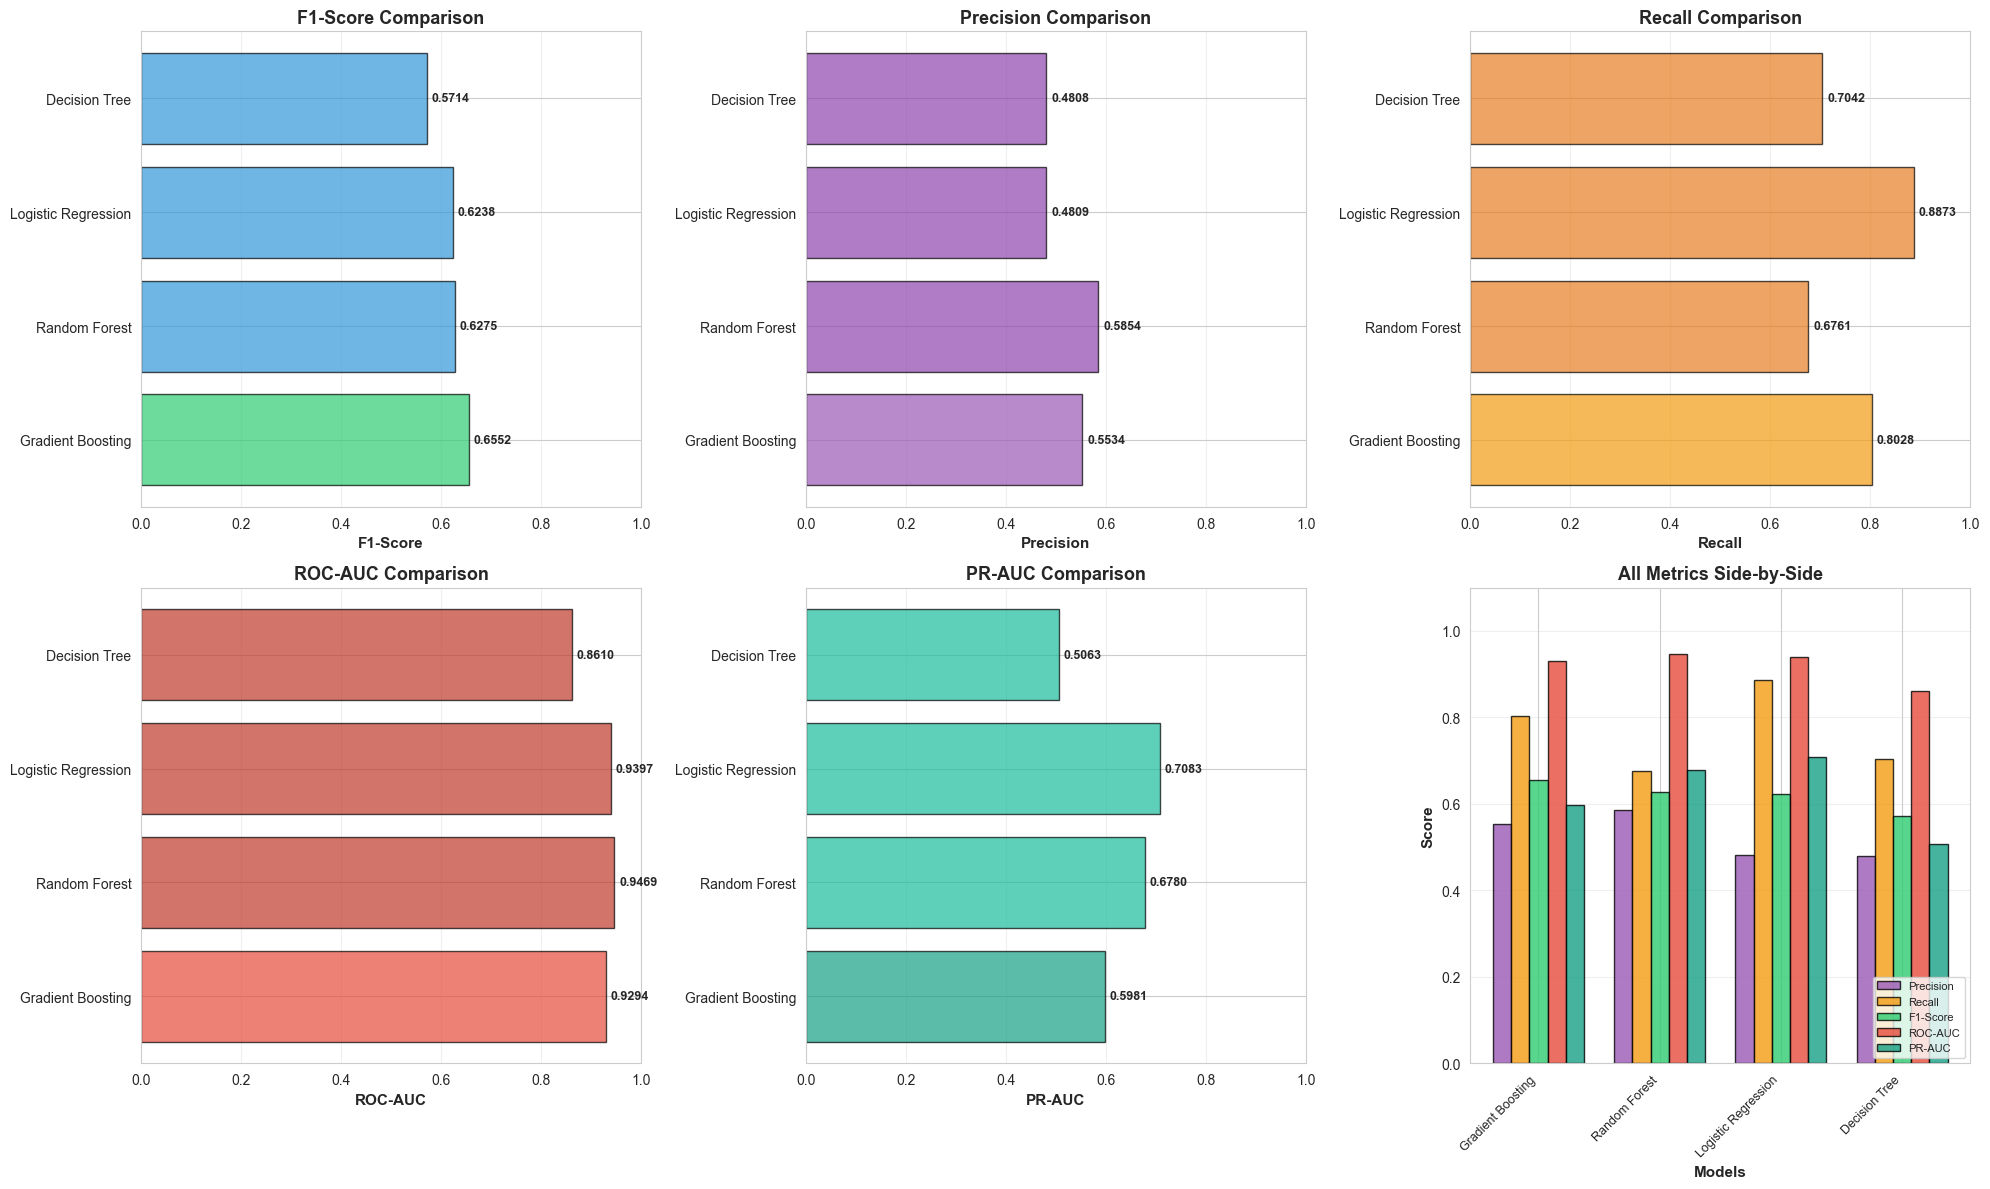

In [27]:
# Comprehensive Visualization of All Metrics (4 models)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. F1-Score comparison
ax1 = axes[0, 0]
colors_f1 = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(results_df))]
bars1 = ax1.barh(results_df['Model'], results_df['F1-Score'], color=colors_f1, alpha=0.7, edgecolor='black')
ax1.set_xlabel('F1-Score', fontweight='bold', fontsize=11)
ax1.set_title('F1-Score Comparison', fontweight='bold', fontsize=13)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['F1-Score'].values):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)
ax1.set_xlim(0, 1.0)

# 2. Precision comparison
ax2 = axes[0, 1]
colors_precision = ['#9b59b6' if i == 0 else '#8e44ad' for i in range(len(results_df))]
bars2 = ax2.barh(results_df['Model'], results_df['Precision'], color=colors_precision, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Precision', fontweight='bold', fontsize=11)
ax2.set_title('Precision Comparison', fontweight='bold', fontsize=13)
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Precision'].values):
    ax2.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)
ax2.set_xlim(0, 1.0)

# 3. Recall comparison
ax3 = axes[0, 2]
colors_recall = ['#f39c12' if i == 0 else '#e67e22' for i in range(len(results_df))]
bars3 = ax3.barh(results_df['Model'], results_df['Recall'], color=colors_recall, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Recall', fontweight='bold', fontsize=11)
ax3.set_title('Recall Comparison', fontweight='bold', fontsize=13)
ax3.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Recall'].values):
    ax3.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)
ax3.set_xlim(0, 1.0)

# 4. ROC-AUC comparison
ax4 = axes[1, 0]
colors_roc = ['#e74c3c' if i == 0 else '#c0392b' for i in range(len(results_df))]
bars4 = ax4.barh(results_df['Model'], results_df['ROC-AUC'], color=colors_roc, alpha=0.7, edgecolor='black')
ax4.set_xlabel('ROC-AUC', fontweight='bold', fontsize=11)
ax4.set_title('ROC-AUC Comparison', fontweight='bold', fontsize=13)
ax4.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['ROC-AUC'].values):
    ax4.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)
ax4.set_xlim(0, 1.0)

# 5. PR-AUC comparison
ax5 = axes[1, 1]
colors_pr = ['#16a085' if i == 0 else '#1abc9c' for i in range(len(results_df))]
bars5 = ax5.barh(results_df['Model'], results_df['PR-AUC'], color=colors_pr, alpha=0.7, edgecolor='black')
ax5.set_xlabel('PR-AUC', fontweight='bold', fontsize=11)
ax5.set_title('PR-AUC Comparison', fontweight='bold', fontsize=13)
ax5.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['PR-AUC'].values):
    ax5.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)
ax5.set_xlim(0, 1.0)

# 6. All metrics radar-style comparison
ax6 = axes[1, 2]
metrics_to_plot = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']
x_pos = np.arange(len(results_df))
width = 0.15

metric_colors = ['#9b59b6', '#f39c12', '#2ecc71', '#e74c3c', '#16a085']
for i, metric in enumerate(metrics_to_plot):
    ax6.bar(x_pos + i*width, results_df[metric], width, 
           label=metric, alpha=0.8, edgecolor='black', color=metric_colors[i])

ax6.set_xlabel('Models', fontweight='bold', fontsize=11)
ax6.set_ylabel('Score', fontweight='bold', fontsize=11)
ax6.set_title('All Metrics Side-by-Side', fontweight='bold', fontsize=13)
ax6.set_xticks(x_pos + width * 2)
ax6.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=9)
ax6.legend(loc='lower right', fontsize=8)
ax6.grid(axis='y', alpha=0.3)
ax6.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

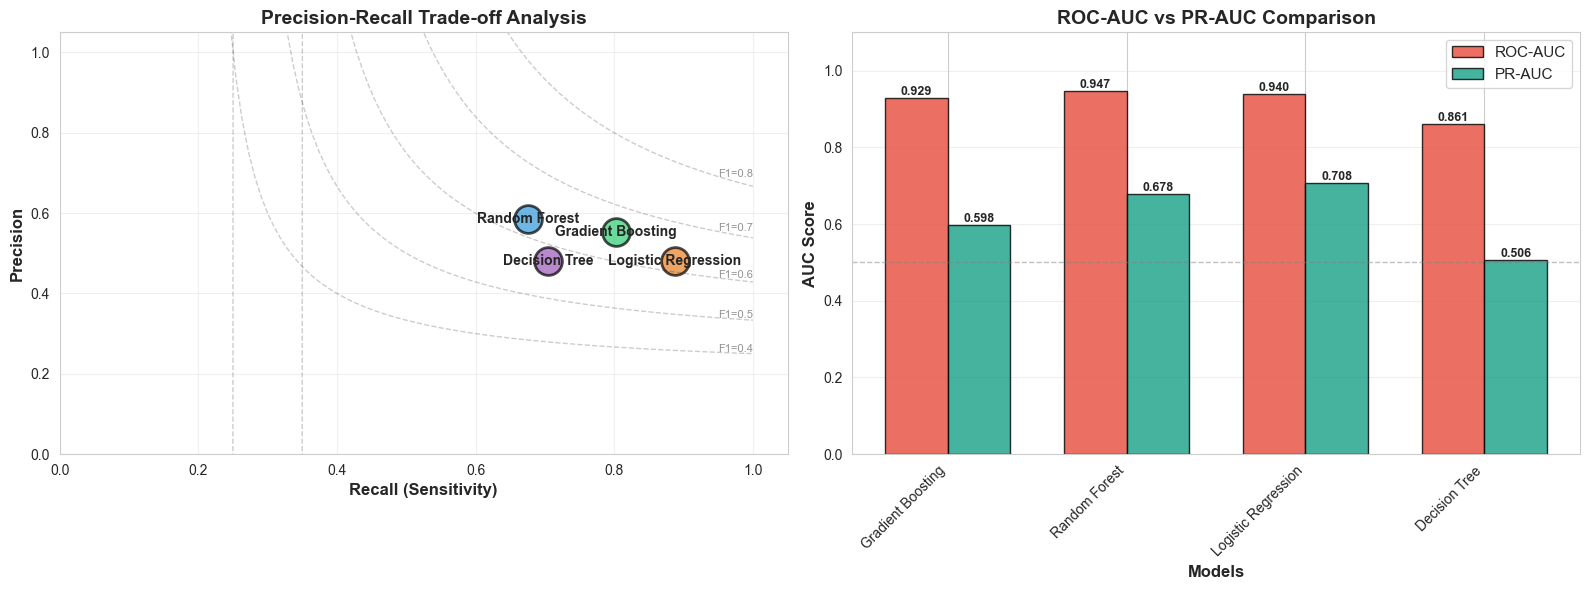

In [28]:
# Precision-Recall Trade-off Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Precision vs Recall Scatter Plot
ax1 = axes[0]
colors_scatter = ['#2ecc71', '#3498db', '#e67e22', '#9b59b6']
for idx, (i, row) in enumerate(results_df.iterrows()):
    ax1.scatter(row['Recall'], row['Precision'], s=400, alpha=0.7, 
               color=colors_scatter[idx % len(colors_scatter)], edgecolor='black', linewidth=2,
               label=row['Model'])
    ax1.annotate(row['Model'], (row['Recall'], row['Precision']), 
                fontsize=10, ha='center', va='center', fontweight='bold')

# Add diagonal line showing F1-Score contours
recall_range = np.linspace(0.1, 1, 100)
for f1_val in [0.4, 0.5, 0.6, 0.7, 0.8]:
    precision_range = (f1_val * recall_range) / (2 * recall_range - f1_val)
    ax1.plot(recall_range, precision_range, 'k--', alpha=0.2, linewidth=1)
    ax1.text(0.95, (f1_val * 0.95) / (2 * 0.95 - f1_val), f'F1={f1_val}', 
            fontsize=8, alpha=0.5)

ax1.set_xlabel('Recall (Sensitivity)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Precision', fontweight='bold', fontsize=12)
ax1.set_title('Precision-Recall Trade-off Analysis', fontweight='bold', fontsize=14)
ax1.grid(alpha=0.3)
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 1.05)

# 2. ROC-AUC vs PR-AUC Comparison
ax2 = axes[1]
x_pos = np.arange(len(results_df))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, results_df['ROC-AUC'], width, 
               label='ROC-AUC', alpha=0.8, edgecolor='black', color='#e74c3c')
bars2 = ax2.bar(x_pos + width/2, results_df['PR-AUC'], width, 
               label='PR-AUC', alpha=0.8, edgecolor='black', color='#16a085')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_xlabel('Models', fontweight='bold', fontsize=12)
ax2.set_ylabel('AUC Score', fontweight='bold', fontsize=12)
ax2.set_title('ROC-AUC vs PR-AUC Comparison', fontweight='bold', fontsize=14)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 1.1)

# Add horizontal line at 0.5 (random classifier baseline)
ax2.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Random Baseline')

plt.tight_layout()
plt.show()

In [29]:
# Detailed evaluation of the best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_predictions = predictions[best_model_name]

print("="*60)
print(f"DETAILED EVALUATION: {best_model_name}")
print("="*60)

# Classification Report
print("\nClassification Report:")
print("-" * 60)
print(classification_report(y_test, best_predictions['y_pred'], 
                          target_names=['Non-Fraud', 'Fraud']))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions['y_pred'])
print("\nConfusion Matrix:")
print("-" * 60)
print(f"                 Predicted")
print(f"                Non-Fraud  Fraud")
print(f"Actual Non-Fraud    {cm[0,0]:5d}    {cm[0,1]:5d}")
print(f"Actual Fraud        {cm[1,0]:5d}    {cm[1,1]:5d}")

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)  # Same as recall
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("\nAdditional Metrics:")
print("-" * 60)
print(f"True Negatives:  {tn:5d}")
print(f"False Positives: {fp:5d}")
print(f"False Negatives: {fn:5d}")
print(f"True Positives:  {tp:5d}")
print(f"\nSpecificity (TNR): {specificity:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print(f"False Negative Rate: {fnr:.4f}")
print("="*60)

DETAILED EVALUATION: Gradient Boosting

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.93      0.96       687
       Fraud       0.55      0.80      0.66        71

    accuracy                           0.92       758
   macro avg       0.77      0.87      0.81       758
weighted avg       0.94      0.92      0.93       758


Confusion Matrix:
------------------------------------------------------------
                 Predicted
                Non-Fraud  Fraud
Actual Non-Fraud      641       46
Actual Fraud           14       57

Additional Metrics:
------------------------------------------------------------
True Negatives:    641
False Positives:    46
False Negatives:    14
True Positives:     57

Specificity (TNR): 0.9330
Sensitivity (TPR): 0.8028
False Positive Rate: 0.0670
False Negative Rate: 0.1972


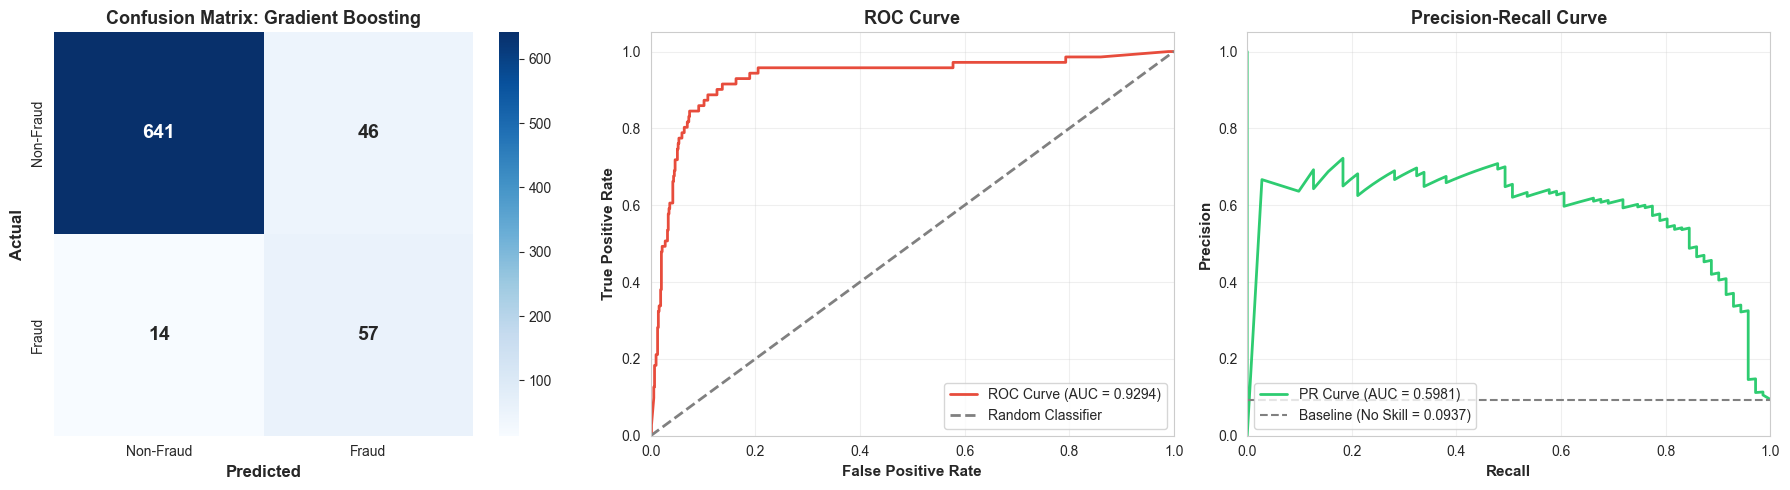

In [30]:
# Visualize Confusion Matrix and ROC/PR Curves for Best Model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
           xticklabels=['Non-Fraud', 'Fraud'],
           yticklabels=['Non-Fraud', 'Fraud'],
           ax=ax1, annot_kws={'size': 14, 'weight': 'bold'})
ax1.set_ylabel('Actual', fontweight='bold', fontsize=12)
ax1.set_xlabel('Predicted', fontweight='bold', fontsize=12)
ax1.set_title(f'Confusion Matrix: {best_model_name}', fontweight='bold', fontsize=13)

# 2. ROC Curve
ax2 = axes[1]
fpr_roc, tpr_roc, _ = roc_curve(y_test, best_predictions['y_pred_proba'])
roc_auc = roc_auc_score(y_test, best_predictions['y_pred_proba'])

ax2.plot(fpr_roc, tpr_roc, color='#e74c3c', lw=2, 
        label=f'ROC Curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontweight='bold', fontsize=11)
ax2.set_ylabel('True Positive Rate', fontweight='bold', fontsize=11)
ax2.set_title('ROC Curve', fontweight='bold', fontsize=13)
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(alpha=0.3)

# 3. Precision-Recall Curve
ax3 = axes[2]
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_predictions['y_pred_proba'])
pr_auc = average_precision_score(y_test, best_predictions['y_pred_proba'])

ax3.plot(recall_curve, precision_curve, color='#2ecc71', lw=2,
        label=f'PR Curve (AUC = {pr_auc:.4f})')
ax3.axhline(y=y_test.sum()/len(y_test), color='gray', linestyle='--', 
           label=f'Baseline (No Skill = {y_test.sum()/len(y_test):.4f})')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('Recall', fontweight='bold', fontsize=11)
ax3.set_ylabel('Precision', fontweight='bold', fontsize=11)
ax3.set_title('Precision-Recall Curve', fontweight='bold', fontsize=13)
ax3.legend(loc='lower left', fontsize=10)
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
# Save the best model (optional)
import pickle

# Save model
model_filename = f'../models/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'

# Create models directory if it doesn't exist
import os
os.makedirs('../models', exist_ok=True)

with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Best model saved: {model_filename}")
print(f"\nTo load this model later, use:")
print(f"```python")
print(f"with open('{model_filename}', 'rb') as f:")
print(f"    model = pickle.load(f)")
print(f"```")

✅ Best model saved: ../models/best_model_gradient_boosting.pkl

To load this model later, use:
```python
with open('../models/best_model_gradient_boosting.pkl', 'rb') as f:
    model = pickle.load(f)
```


## Summary

### Pipeline Components:
1. **SMOTE** - Synthetic Minority Over-sampling to handle class imbalance
2. **StandardScaler** - Feature normalization
3. **Classifier** - Machine learning model

### Models Trained:
- Decision Tree
- Random Forest
- Gradient Boosting
- Logistic Regression

**Note:** SVM was excluded due to long training time with this dataset size.

### Key Features:
- ✅ GridSearchCV for hyperparameter tuning
- ✅ 5-Fold Stratified Cross-Validation
- ✅ Class imbalance handling with SMOTE
- ✅ Comprehensive evaluation metrics
- ✅ Best model saved for future use